In [1]:
from keras.models import load_model
import numpy as np

/home/ajuric/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('./CNet-conv_2d_N3.h5')

In [3]:
X, y = np.load('pysam-dataset-n3-X.npy'), np.load('pysam-dataset-n3-y.npy')
new_X = list()
for xi in X:
    new_xi = np.dstack((xi[:, 0].reshape(7, 1), xi[:, 1].reshape(7, 1), xi[:, 2].reshape(7, 1), xi[:, 3].reshape(7, 1)))
    new_X.append(new_xi)

new_X = np.array(new_X)
print(new_X.shape)

X = new_X

from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.10)
print(X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)

(3573946, 7, 1, 4)
(3216551, 7, 1, 4) (357395, 7, 1, 4) (3216551, 4) (357395, 4)


In [4]:
print(y[0], y[1])

[0. 0. 1. 0.] [0. 0. 1. 0.]


In [5]:
model.predict(np.expand_dims(X[0], axis=0))

array([[0.0027561 , 0.00182641, 0.99206674, 0.00335073]], dtype=float32)

In [23]:
probabilities = model.predict(X_validate)

In [24]:
predictions = np.zeros(probabilities.shape)
for i, p in enumerate(probabilities):
    max_val = np.argmax(p)
    new_p = np.zeros(4)
    new_p[max_val] = 1
    predictions[i] = new_p

In [8]:
print(probabilities)
print(predictions)

[[2.3438160e-05 6.1633019e-04 8.5906743e-04 9.9850118e-01]
 [9.9865133e-01 1.3485006e-03 1.5308430e-07 1.4199684e-07]
 [9.9918503e-01 8.0485048e-04 5.7127113e-06 4.4350713e-06]
 ...
 [4.5385980e-03 8.1818961e-03 9.8623264e-01 1.0467755e-03]
 [1.2390576e-04 9.9987376e-01 3.6125009e-08 2.2822774e-06]
 [4.8262562e-04 9.9951208e-01 1.5060081e-07 5.0670601e-06]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


## Show all incorrect

In [9]:
counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate, y_validate, probabilities, predictions):
    if not np.all(yi == pred_i):
        counter += 1
        print('=============================================')
        print('xi:\n', xi)
        print('yi:', yi)
        print('prob_i:', prob_i)
        print('pred_i:', pred_i)
        print('=============================================')
        
print(y_validate.shape)
print(counter)

xi:
 [[[  2.   0. 114.   2.]]

 [[  2.   0.   0. 118.]]

 [[110.   0.   2.   5.]]

 [[ 19.   9.   4.  76.]]

 [[ 23.   1.  13.  75.]]

 [[  8.  18.   0.  90.]]

 [[  7.  49.   1.  61.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.2163388e-02 2.9432114e-02 5.5749924e-04 9.5784706e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 1.  0.  0. 98.]]

 [[95.  2.  1.  1.]]

 [[ 0. 99.  0.  0.]]

 [[ 4. 74. 13.  1.]]

 [[ 1.  0. 96.  1.]]

 [[96.  0.  0.  1.]]

 [[ 0. 96.  0.  1.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.00097343 0.17081293 0.20625353 0.6219601 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0.   1.   0. 107.]]

 [[  0.   0. 105.   2.]]

 [[  0.   0. 110.   0.]]

 [[  1.   5.   7.  84.]]

 [[  0.   0.   1. 109.]]

 [[  0.   0. 103.   6.]]

 [[  0.   0. 107.   2.]]]
yi: [0. 1. 0. 0.]
prob_i: [4.1119610e-03 4.6653356e-02 7.0925138e-04 9.4852543e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  1.   0. 107.   0.]]

 [[  0.   1.   2. 107.]]

 [[  0. 108.   1.   0.]]

 [[  7.   3.  83.   9.]]

 [[  0.   0.   3. 104.]]

 [[107.   0.   0.   0.]]



prob_i: [0.11295894 0.00937777 0.8735599  0.00410342]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  0.   1.   0. 106.]]

 [[  1.  99.   0.   6.]]

 [[  0.   1.   0. 107.]]

 [[  1.   1.  17.  78.]]

 [[  0.   6.   3.  94.]]

 [[  0.   0. 102.   7.]]

 [[  0.   1.   5.  97.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.01066604 0.08188114 0.02880999 0.87864286]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  1.   0.   1. 107.]]

 [[111.   0.   1.   0.]]

 [[  3.   0.   0. 103.]]

 [[  3.  80.   8.  22.]]

 [[  0.   6. 108.   3.]]

 [[  0.   0.   4. 109.]]

 [[  0.   0.   0. 115.]]]
yi: [0. 0. 0. 1.]
prob_i: [1.8307575e-04 5.5403513e-01 1.3450800e-02 4.3233103e-01]
pred_i: [0. 1. 0. 0.]
xi:
 [[[94.  1.  0.  0.]]

 [[ 1.  1. 93.  1.]]

 [[97.  1.  0.  0.]]

 [[80.  4.  2.  8.]]

 [[ 1.  0.  4. 94.]]

 [[ 1.  0. 96.  1.]]

 [[98.  1.  0.  1.]]]
yi: [0. 1. 0. 0.]
prob_i: [2.4744252e-02 8.3482744e-05 8.3063924e-01 1.4453305e-01]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  5.   0.   1.  97.]]

 [[100.   2.   0.   1.]]

 [[104.   0.   0.   0.]]

 [

prob_i: [4.5173365e-04 9.4286460e-01 4.0220347e-04 5.6281433e-02]
pred_i: [0. 1. 0. 0.]
xi:
 [[[102.   1.   0.   0.]]

 [[  1.   1.   1.  99.]]

 [[  2.   0. 100.   0.]]

 [[ 61.   8.   5.  12.]]

 [[ 20.  66.   1.  15.]]

 [[  3.  16.  85.   2.]]

 [[ 69.   2.  30.   5.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.98181057 0.01385099 0.00149317 0.00284533]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 0.  5. 89.  3.]]

 [[ 2. 16.  2. 78.]]

 [[87.  2.  2.  6.]]

 [[48.  5. 26.  3.]]

 [[35. 41. 10.  2.]]

 [[ 1.  8. 89.  0.]]

 [[ 2.  0. 96.  0.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.92028546 0.02313226 0.04549409 0.01108819]
pred_i: [1. 0. 0. 0.]
xi:
 [[[  0.   0. 104.   0.]]

 [[  0.   0.   1. 100.]]

 [[  2. 102.   0.   2.]]

 [[  5.   9.  86.   1.]]

 [[  0.  98.   4.   4.]]

 [[  1.   2.   1. 102.]]

 [[  1.   2.  90.   3.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.28778177 0.01385127 0.697537   0.00082998]
pred_i: [0. 0. 1. 0.]
xi:
 [[[39.  1.  1.  0.]]

 [[ 1. 40.  0.  0.]]

 [[41.  0.  0.  1.]]

 [[ 3.  6.  0. 32.]]

 [[3

prob_i: [3.3236679e-04 7.1795680e-02 1.4127818e-03 9.2645919e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0.   6. 104.   0.]]

 [[  3.   0. 114.   0.]]

 [[109.   4.   2.   0.]]

 [[ 13.  94.   2.   2.]]

 [[108.  10.   0.   0.]]

 [[113.   3.   2.   0.]]

 [[  2.  98.   0.   1.]]]
yi: [0. 0. 0. 1.]
prob_i: [2.8390351e-03 9.6653259e-01 3.2111950e-04 3.0307312e-02]
pred_i: [0. 1. 0. 0.]
xi:
 [[[69.  0.  1.  1.]]

 [[ 2.  2.  0. 57.]]

 [[ 0.  0.  0. 69.]]

 [[ 0.  0. 50. 21.]]

 [[ 0.  0. 71.  0.]]

 [[ 0. 66.  5.  0.]]

 [[ 1. 66.  3.  0.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.00790094 0.02729562 0.93052185 0.03428156]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  1.   0.  98.   3.]]

 [[  0.   2.  99.   0.]]

 [[  3.  79.   6.   3.]]

 [[  1.  33.   3.  67.]]

 [[  0.   0.   1. 104.]]

 [[  0.   0.   1. 105.]]

 [[ 98.   0.   0.   7.]]]
yi: [0. 1. 0. 0.]
prob_i: [4.5707705e-03 1.1121678e-01 8.1370008e-04 8.8339877e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 0.  1.  9. 81.]]

 [[ 0.  1. 89.  1.]]

 [[ 1. 43.  5. 29.]]

 [

prob_i: [0.00380765 0.9191904  0.00248476 0.0745172 ]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 0.  0.  0. 42.]]

 [[ 0.  1. 31.  2.]]

 [[22.  0. 16.  3.]]

 [[19.  0.  0. 22.]]

 [[41.  0.  2.  1.]]

 [[ 0.  0. 42.  2.]]

 [[ 2. 36.  1.  0.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.2194771  0.17441098 0.08862002 0.5174918 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 1. 91.  0.  0.]]

 [[ 0.  8. 81.  0.]]

 [[ 1.  0. 88.  0.]]

 [[ 1. 73. 11.  1.]]

 [[ 0.  6. 86.  0.]]

 [[ 0.  1. 88.  3.]]

 [[ 0.  2.  0. 88.]]]
yi: [1. 0. 0. 0.]
prob_i: [4.4328021e-04 7.6160944e-01 2.9202234e-02 2.0874503e-01]
pred_i: [0. 1. 0. 0.]
xi:
 [[[99.  0.  0.  0.]]

 [[ 2.  0.  0. 96.]]

 [[ 0. 95.  1.  1.]]

 [[ 7.  4. 75.  7.]]

 [[ 1.  0.  4. 95.]]

 [[ 1.  1.  0. 98.]]

 [[93.  0.  0.  5.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.06571575 0.00167102 0.92905194 0.0035613 ]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  2.  96.   2.   0.]]

 [[ 98.   1.   0.   0.]]

 [[  2.   0.  94.   0.]]

 [[  2.  77.  12.   2.]]

 [[  0.   1. 100.   1.]]

 [[  0.  95.   0. 

xi:
 [[[  1.   2.   3. 103.]]

 [[  0.   0.   1. 110.]]

 [[  1.  98.   0.   5.]]

 [[  1.  25.   3.  81.]]

 [[  0.   2.   1. 107.]]

 [[  0. 104.   2.   3.]]

 [[  0. 109.   0.   0.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.2521042e-03 7.6699555e-02 4.5300167e-04 9.2159539e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 1. 83.  0.  1.]]

 [[ 1.  2. 82.  1.]]

 [[ 1. 67.  4.  0.]]

 [[ 0. 25.  2. 61.]]

 [[ 0.  2.  0. 86.]]

 [[81.  1.  0.  4.]]

 [[ 1.  0.  1. 83.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.7397689e-03 7.6049268e-02 7.5123616e-04 9.2145973e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 0.  1. 85.  1.]]

 [[ 0. 83.  1.  0.]]

 [[85.  1.  1.  0.]]

 [[ 2. 69.  5.  0.]]

 [[ 1. 84.  2.  0.]]

 [[ 0.  3. 80.  1.]]

 [[ 0.  0. 87.  1.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.00141246 0.30607337 0.07793761 0.6145766 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  1.   1.  96.   1.]]

 [[  1.   2. 101.   0.]]

 [[  1.  99.   2.   0.]]

 [[  3.   3.  89.   0.]]

 [[  1. 100.   1.   0.]]

 [[  0.   0.   1. 100.]]

 [[  2.   0.  82.   1.]]]
yi

 [[ 0.  0. 83.  0.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.7641599  0.00272104 0.22072463 0.01239445]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 0. 89.  0.  0.]]

 [[ 1.  0. 84.  2.]]

 [[ 0.  0.  2. 85.]]

 [[ 1.  4.  7. 63.]]

 [[ 0.  0. 76.  9.]]

 [[ 1.  0. 81.  5.]]

 [[ 1.  0.  2. 81.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.01007381 0.17370959 0.01644013 0.7997765 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  5.   0. 100.   0.]]

 [[  1.   1. 108.   2.]]

 [[  1.   2.   0. 110.]]

 [[  2.  11.   7.  76.]]

 [[  1. 101.   2.   7.]]

 [[  1. 105.   2.   3.]]

 [[  1.   2. 105.   1.]]]
yi: [0. 0. 1. 0.]
prob_i: [9.9780336e-02 7.6479471e-01 3.1426450e-04 1.3511069e-01]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 1.  2.  0. 85.]]

 [[ 2.  1.  2. 86.]]

 [[63.  5. 10.  6.]]

 [[15.  1.  0. 39.]]

 [[75.  3.  1.  6.]]

 [[37. 48.  1.  1.]]

 [[21.  8.  0. 57.]]]
yi: [0. 0. 0. 1.]
prob_i: [4.3307340e-01 4.9703720e-01 2.8804611e-04 6.9601335e-02]
pred_i: [0. 1. 0. 0.]
xi:
 [[[2. 0. 0. 1.]]

 [[0. 3. 0. 0.]]

 [[0. 3. 0. 0.]]

 [[1. 2. 0. 0.

yi: [0. 0. 1. 0.]
prob_i: [0.645175   0.00273727 0.30208915 0.04999855]
pred_i: [1. 0. 0. 0.]
xi:
 [[[2. 2. 1. 2.]]

 [[0. 0. 6. 0.]]

 [[0. 0. 0. 6.]]

 [[0. 2. 2. 1.]]

 [[0. 3. 2. 0.]]

 [[0. 1. 1. 3.]]

 [[0. 4. 1. 0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.1660032  0.26584637 0.19362397 0.3745264 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 1.  2.  1. 12.]]

 [[ 1.  1.  1. 14.]]

 [[ 1.  1. 10.  5.]]

 [[ 0.  6. 10.  1.]]

 [[ 3.  1.  1. 12.]]

 [[ 2.  0.  1. 14.]]

 [[ 1.  0.  1. 15.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.13112901 0.20477827 0.31877485 0.3453178 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 2.  0. 34. 50.]]

 [[ 1. 14. 78.  5.]]

 [[ 0. 94.  1.  3.]]

 [[ 2. 67. 21.  1.]]

 [[ 2.  7. 87.  3.]]

 [[ 1. 95.  1.  0.]]

 [[94.  2.  0.  1.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.0055379  0.6922656  0.13012408 0.17207235]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  1.   1.   1. 100.]]

 [[  1.  96.   1.   4.]]

 [[ 10.   7.   1.  48.]]

 [[  1.  41.   0.  50.]]

 [[  0.  18.  79.   3.]]

 [[  3.   0.  94.   4.]]

 [[  8.   8.  

 [[  0. 112.   3.   0.]]]
yi: [1. 0. 0. 0.]
prob_i: [5.2096643e-03 8.8881582e-02 3.2189855e-04 9.0558678e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[85.  0.  0.  0.]]

 [[ 0.  0. 84.  1.]]

 [[ 0.  2.  2. 78.]]

 [[10.  1. 66.  2.]]

 [[ 8.  6. 64.  3.]]

 [[ 1. 80.  0.  0.]]

 [[74.  0.  1.  1.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.01068861 0.00171286 0.98562104 0.00197739]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  1. 104.   0.   0.]]

 [[106.   0.   0.   0.]]

 [[105.   0.   0.   0.]]

 [[  9.   7.   1.  81.]]

 [[ 98.   0.   0.  10.]]

 [[108.   0.   0.   0.]]

 [[  1. 102.   1.   1.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.5196050e-02 4.1904971e-02 5.1300897e-04 9.4238597e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0. 106.   0.   0.]]

 [[104.   1.   0.   0.]]

 [[  2.   1.  99.   2.]]

 [[ 19.  81.   2.   1.]]

 [[ 95.   5.   1.   0.]]

 [[  5.   2.  86.   1.]]

 [[ 72.   6.  24.   1.]]]
yi: [1. 0. 0. 0.]
prob_i: [2.2948836e-03 9.9660540e-01 2.4726807e-05 1.0750821e-03]
pred_i: [0. 1. 0. 0.]
xi:
 [[[0. 0. 0. 1.]]

 [[0. 

 [[  1.   0. 105.   0.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.3640041  0.60085547 0.03205358 0.00308693]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  3. 103.   3.   0.]]

 [[105.   1.   2.   1.]]

 [[  1.   0. 106.   2.]]

 [[ 92.   3.   7.   1.]]

 [[  6.   0. 106.   0.]]

 [[109.   0.   0.   2.]]

 [[  1.   0.   0. 109.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.71500754 0.00419658 0.22733934 0.05345655]
pred_i: [1. 0. 0. 0.]
xi:
 [[[  1. 100.   1.   0.]]

 [[ 34.   3.  27.   1.]]

 [[  4.  40.   2.  18.]]

 [[ 55.   0.  34.   0.]]

 [[  0.  93.   2.   0.]]

 [[  0.  59.   3.  37.]]

 [[  0.   1. 100.   1.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.11382786 0.00506904 0.86702585 0.01407718]
pred_i: [0. 0. 1. 0.]
xi:
 [[[89.  1.  0.  3.]]

 [[99.  0.  1.  1.]]

 [[ 1.  0.  3. 96.]]

 [[26.  4. 67.  2.]]

 [[81.  4.  9.  5.]]

 [[ 1.  1.  2. 96.]]

 [[ 1. 99.  0.  0.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.38628685 0.01070836 0.60126054 0.00174423]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 18.  88.   6.   1.]]

 [[  0.   0. 113.   2.]]

 [[  0. 

prob_i: [0.1187126  0.03796034 0.82445574 0.01887131]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0. 89.  1.  6.]]

 [[ 2.  5.  1. 82.]]

 [[ 0.  5.  1. 92.]]

 [[ 1. 71.  3. 22.]]

 [[ 0. 17. 79.  0.]]

 [[ 1.  2. 93.  0.]]

 [[ 1. 93.  2.  1.]]]
yi: [0. 0. 0. 1.]
prob_i: [3.5335796e-04 5.9585619e-01 2.1342784e-02 3.8244760e-01]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  0. 110.   1.   0.]]

 [[110.   1.   0.   0.]]

 [[  1.   0. 106.   2.]]

 [[  2.   9.  80.   1.]]

 [[  1.   1. 108.   0.]]

 [[  1. 103.   5.   0.]]

 [[  0.   1.   0. 105.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.04642939 0.19981197 0.74744    0.00631866]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 2. 29.  1.  2.]]

 [[ 4.  0.  2. 27.]]

 [[ 2.  0. 23.  4.]]

 [[14.  2. 19.  1.]]

 [[ 0.  2.  5. 25.]]

 [[ 3.  0. 33.  0.]]

 [[ 0.  0. 19. 11.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.06271919 0.03529884 0.7455241  0.15645789]
pred_i: [0. 0. 1. 0.]
xi:
 [[[21.  0.  2.  0.]]

 [[ 0.  0. 23.  0.]]

 [[ 0.  1. 14.  0.]]

 [[ 0. 18.  4.  0.]]

 [[ 0. 23.  0.  0.]]

 [[ 0.  0.

prob_i: [0.03318323 0.01836997 0.9427342  0.00571265]
pred_i: [0. 0. 1. 0.]
xi:
 [[[99.  1.  0.  0.]]

 [[98.  0.  0.  1.]]

 [[89.  1.  0.  6.]]

 [[ 5.  4.  2. 78.]]

 [[ 0.  0.  0. 97.]]

 [[ 0.  2.  0. 96.]]

 [[ 0. 98.  0.  1.]]]
yi: [0. 1. 0. 0.]
prob_i: [4.4060312e-03 1.4792470e-02 8.0382667e-04 9.7999763e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 1.  1.  0. 11.]]

 [[ 0.  1.  0. 14.]]

 [[ 1.  0. 12.  1.]]

 [[ 0.  9.  5.  2.]]

 [[ 2.  0. 13.  0.]]

 [[ 4.  0. 11.  1.]]

 [[14.  0.  0.  2.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.06236203 0.19893128 0.2717544  0.46695226]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 0. 83.  0.  0.]]

 [[ 0. 85.  0.  3.]]

 [[ 0.  5.  0. 84.]]

 [[ 0.  8.  7. 60.]]

 [[ 2.  0. 73. 13.]]

 [[ 2.  0. 85.  1.]]

 [[ 0.  0. 87.  0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.01499593 0.40391716 0.01109731 0.56998956]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  1. 103.   0.   0.]]

 [[ 98.   1.   4.   0.]]

 [[  1.   1. 101.   0.]]

 [[ 30.   3.  54.   0.]]

 [[ 44.   8.  37.   2.]]

 [[ 14.  79.   2. 

 [[ 5. 10.  1. 20.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.08411817 0.22344148 0.07540575 0.6170346 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[95.  2.  0.  0.]]

 [[ 0.  1. 93.  0.]]

 [[12. 68.  1.  7.]]

 [[72.  5. 13.  0.]]

 [[ 5.  3. 84.  2.]]

 [[ 5.  0.  1. 89.]]

 [[94.  0.  0.  0.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.89916646 0.00707791 0.07881633 0.01493934]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 92.   1.   3.  10.]]

 [[  0.   2. 102.   1.]]

 [[ 17.  52.   1.  30.]]

 [[ 56.   2.  47.   1.]]

 [[ 22.   7.  79.   1.]]

 [[  1. 106.   2.   0.]]

 [[  1.   1.   1. 102.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.6597152  0.018227   0.3157702  0.00628764]
pred_i: [1. 0. 0. 0.]
xi:
 [[[  0.   1.  97.   1.]]

 [[  1.  83.   2.   0.]]

 [[  1.  95.   2.   3.]]

 [[  0.  21.   9.  71.]]

 [[  4.   1.  83.  13.]]

 [[  0.   1. 101.   0.]]

 [[  0.  96.   5.   1.]]]
yi: [0. 1. 0. 0.]
prob_i: [6.8422814e-04 8.3687484e-02 1.3368173e-02 9.0226007e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 4. 71.  3.  3.]]

 [[ 0. 16. 75.  2.]]

 [[ 1.  

xi:
 [[[  3.  75.   8.  29.]]

 [[  1.   7.   0. 105.]]

 [[  0.   1.  16.  95.]]

 [[  3.   2.  87.  12.]]

 [[  0.   1.  10. 106.]]

 [[  0.   0.   2. 115.]]

 [[  0.   1.   4. 110.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.22382222 0.02178624 0.75091743 0.00347417]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  0.   2.   0. 128.]]

 [[  0.   0. 131.   0.]]

 [[126.   0.   1.   1.]]

 [[ 29.   1. 103.   0.]]

 [[115.   9.   7.   2.]]

 [[  3. 125.   0.   0.]]

 [[  0.   1.   1. 122.]]]
yi: [1. 0. 0. 0.]
prob_i: [5.8055893e-02 8.9875812e-04 9.4047141e-01 5.7386461e-04]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  0.  2. 31.]]

 [[ 0.  1. 31.  0.]]

 [[ 1. 26.  0.  2.]]

 [[ 4.  4.  4.  1.]]

 [[ 0. 23.  3.  0.]]

 [[ 0.  9. 17.  1.]]

 [[ 0.  0.  0. 25.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.14173444 0.06716277 0.47013217 0.32097065]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  0.   0. 114.   0.]]

 [[ 94.   1.   1.   0.]]

 [[108.   1.   3.   0.]]

 [[ 26.   8.  80.   0.]]

 [[  0. 103.   9.   0.]]

 [[  1. 111.   0.   0.]]

 [[106.   2.

xi:
 [[[  0.   0.   2.  95.]]

 [[  0.   2.   1. 101.]]

 [[  0.   2.   0. 102.]]

 [[  8.  82.   9.   1.]]

 [[ 98.   3.   1.   1.]]

 [[  2.   1. 101.   2.]]

 [[  0.   2.   0.  95.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.00195759 0.83331776 0.04072455 0.12400009]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  4. 163.   1.   0.]]

 [[142.   4.   0.   0.]]

 [[115.   4.  46.   1.]]

 [[ 99.   3.  65.   0.]]

 [[  1.   3. 164.   0.]]

 [[159.   2.   3.   1.]]

 [[  6. 106.   2.  33.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.10763334 0.00093357 0.8899658  0.00146739]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 1.  0.  2. 64.]]

 [[57.  1.  6.  0.]]

 [[ 4. 62.  2.  0.]]

 [[54.  1.  7.  3.]]

 [[ 2.  0. 64.  1.]]

 [[67.  0.  1.  0.]]

 [[ 4. 54.  1.  0.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.25908244 0.00411848 0.65639204 0.08040705]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  0. 90.  1.]]

 [[89.  1.  1.  0.]]

 [[89.  1.  0.  0.]]

 [[ 2. 78.  3.  5.]]

 [[ 0.  3. 84.  3.]]

 [[ 0.  1.  1. 89.]]

 [[ 0.  0. 87.  5.]]]
yi: [0. 0. 0. 1.]
prob_i: 

 [[[ 98.   1.   1.   1.]]

 [[  2.   0.  94.   3.]]

 [[  1.   0.   1.  98.]]

 [[  5.   1.  79.   2.]]

 [[  0.   1. 101.   0.]]

 [[  1.  96.   4.   0.]]

 [[  0.   0.  98.   0.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.07569639 0.04307229 0.879275   0.00195634]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  0.  5. 12.]]

 [[14.  2.  0.  1.]]

 [[ 2.  9.  0.  1.]]

 [[ 2. 17.  3.  2.]]

 [[24.  0.  0.  1.]]

 [[ 9.  0. 15.  1.]]

 [[12.  0. 19.  0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.03134783 0.11108506 0.29428554 0.5632816 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[107.   3.   1.   0.]]

 [[  1. 104.   3.   0.]]

 [[  0.   1. 108.   0.]]

 [[  2.   5.  83.   1.]]

 [[  1.   3. 107.   0.]]

 [[  0. 101.   7.   0.]]

 [[  0. 106.   4.   0.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.08015171 0.34564832 0.5718128  0.00238715]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  0.   0.   0. 103.]]

 [[101.   1.   0.   3.]]

 [[  0.   0.   0. 102.]]

 [[  4.   5.   2.  82.]]

 [[  3.   0.   0. 104.]]

 [[105.   0.   1.   1.]]

 [[  3.   1.   1. 102.]]]
yi

xi:
 [[[  0.   0.  99.   0.]]

 [[  0.   1.   1. 100.]]

 [[  1.   0.   2. 100.]]

 [[  7.   6.  86.   2.]]

 [[  1.  96.   5.   0.]]

 [[ 95.   4.   1.   1.]]

 [[  1.   0.  98.   0.]]]
yi: [1. 0. 0. 0.]
prob_i: [3.9244484e-02 3.5750777e-03 9.5632952e-01 8.5088250e-04]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  1.  4. 92.]]

 [[ 0.  0. 96.  1.]]

 [[ 0.  2.  2. 83.]]

 [[ 7.  2. 74. 12.]]

 [[90.  0.  6.  1.]]

 [[ 0.  1.  0. 95.]]

 [[ 1. 94.  0.  0.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.16088063 0.02145344 0.8117915  0.00587448]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  0.  0. 98.]]

 [[ 0.  0. 93.  2.]]

 [[ 1.  0.  1. 93.]]

 [[ 1. 15.  1. 70.]]

 [[ 2.  4.  1. 91.]]

 [[ 2. 95.  1.  1.]]

 [[93.  2.  2.  0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.01607117 0.1356087  0.00308026 0.8452398 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 2. 74.  1.  1.]]

 [[ 0. 77.  3.  2.]]

 [[ 0.  0. 81.  2.]]

 [[ 1.  1.  5. 68.]]

 [[ 0.  0.  0. 81.]]

 [[ 0.  0.  0. 83.]]

 [[ 0.  0.  0. 83.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.00520995 0.03

pred_i: [0. 0. 0. 1.]
xi:
 [[[2. 0. 0. 0.]]

 [[0. 2. 0. 0.]]

 [[0. 0. 2. 0.]]

 [[0. 2. 0. 0.]]

 [[2. 0. 0. 0.]]

 [[0. 0. 2. 0.]]

 [[0. 2. 0. 0.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.36687142 0.4541109  0.05758569 0.121432  ]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 0. 94.  4.  1.]]

 [[60.  2.  4. 34.]]

 [[ 2.  2. 93.  2.]]

 [[ 1. 26.  8. 61.]]

 [[ 0.  3. 90.  3.]]

 [[ 1. 92.  2.  1.]]

 [[ 1.  1. 95.  1.]]]
yi: [0. 1. 0. 0.]
prob_i: [3.9203992e-04 1.6907521e-01 2.4729150e-03 8.2805985e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[ 2. 68.  4.  8.]]

 [[ 1. 18. 77.  1.]]

 [[ 0.  2. 89.  5.]]

 [[ 0.  9. 22. 65.]]

 [[ 0. 89.  1.  6.]]

 [[ 0. 92.  3.  1.]]

 [[ 0.  2. 90.  2.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.01182647 0.25557306 0.00834628 0.7242542 ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[60.  8. 15.  1.]]

 [[ 1. 96.  0.  0.]]

 [[91.  4.  1.  0.]]

 [[37.  2. 59.  0.]]

 [[88.  1.  9.  0.]]

 [[92.  5.  0.  0.]]

 [[ 1. 91.  0.  2.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.23312367 0.00516466 0.75363225 0.00807949]
pred

 [[ 98.   0.   0.   1.]]]
yi: [0. 0. 1. 0.]
prob_i: [0.00705547 0.01168355 0.00295213 0.97830886]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  3. 117.   1.   0.]]

 [[122.   1.   0.   0.]]

 [[118.   1.   0.   3.]]

 [[  3.  12.   8.  92.]]

 [[  1.   2. 109.   8.]]

 [[  1.   0. 118.   4.]]

 [[  1.   0.   0. 119.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.1677326e-04 1.4641385e-02 1.3550465e-03 9.8388678e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0.   1. 110.   1.]]

 [[  6.   0. 105.   0.]]

 [[102.   1.   1.   0.]]

 [[ 85.  11.   0.   0.]]

 [[111.   1.   0.   0.]]

 [[  2. 104.   1.   0.]]

 [[106.   0.   2.   0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.9369744  0.00606913 0.04326064 0.01369584]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 0.  0.  3. 88.]]

 [[ 0.  1.  1. 98.]]

 [[ 3.  0.  1. 97.]]

 [[78. 12.  4.  3.]]

 [[ 1.  2. 94.  0.]]

 [[ 1. 92.  0.  0.]]

 [[ 3. 96.  0.  0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.93270075 0.01904539 0.04376683 0.00448706]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 0.  0. 89.  1.]]

 [[ 0. 84.  2.  1.]]

 [[ 

pred_i: [1. 0. 0. 0.]
xi:
 [[[  2. 113.   0.   2.]]

 [[  0.   3.   0. 114.]]

 [[111.   1.   4.   0.]]

 [[  0.  11.  15.  88.]]

 [[  0.   0. 110.   4.]]

 [[  0. 101.   4.   1.]]

 [[  1. 109.   2.   1.]]]
yi: [0. 1. 0. 0.]
prob_i: [9.5417818e-05 3.1911630e-02 6.7980099e-04 9.6731323e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0. 130.   0.   3.]]

 [[  0.   2.   2. 129.]]

 [[  0.   4. 125.   0.]]

 [[  5. 102.  14.   2.]]

 [[  0.   3. 125.   2.]]

 [[  1. 128.   1.   1.]]

 [[122.   2.   3.   1.]]]
yi: [1. 0. 0. 0.]
prob_i: [6.1591440e-05 9.0128070e-01 5.6009516e-03 9.3056768e-02]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 0.  1. 88.  0.]]

 [[83.  2.  2.  0.]]

 [[ 2.  3. 85.  0.]]

 [[28. 37.  9.  0.]]

 [[46. 33.  7.  1.]]

 [[85.  4.  0.  0.]]

 [[80.  0.  9.  0.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.47357565 0.48982817 0.00492681 0.03166938]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  5.   1. 103.   1.]]

 [[104.   0.   2.   0.]]

 [[108.   0.   0.   1.]]

 [[  6.  16.   2.  83.]]

 [[  1.  98.   4.   5.]]

 [[ 

xi:
 [[[  1.   7.  13.  79.]]

 [[  0.   0. 100.   7.]]

 [[  1.   0.   2. 104.]]

 [[  4.  10.  90.   2.]]

 [[ 99.   4.   1.   2.]]

 [[  1. 102.   0.   1.]]

 [[  4. 102.   0.   1.]]]
yi: [0. 1. 0. 0.]
prob_i: [2.7719131e-03 8.4519957e-04 9.9590564e-01 4.7729621e-04]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0. 92.  0.  2.]]

 [[ 0.  2.  1. 89.]]

 [[ 1. 83.  0.  3.]]

 [[ 1. 22.  2. 69.]]

 [[ 1.  1.  0. 93.]]

 [[90.  1.  0.  4.]]

 [[ 4. 89.  2.  0.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.1096623e-03 3.2852557e-02 9.3999231e-04 9.6509778e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[107.   0.   5.   0.]]

 [[  0.   0. 116.   0.]]

 [[ 98.   0.   6.   5.]]

 [[  6.   6.  84.  13.]]

 [[  1.   0.  13. 103.]]

 [[  0.   2.   0. 116.]]

 [[  0.   1.   0. 117.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.5121888  0.18585992 0.2744208  0.02753048]
pred_i: [1. 0. 0. 0.]
xi:
 [[[ 1. 87.  0.  0.]]

 [[ 1.  0. 84.  1.]]

 [[ 0.  1. 87.  0.]]

 [[ 2. 65. 11.  2.]]

 [[ 0.  7. 84.  0.]]

 [[ 0. 87.  2.  0.]]

 [[ 0.  1. 87.  1.]]]
yi

prob_i: [0.00148018 0.1874065  0.06116962 0.74994373]
pred_i: [0. 0. 0. 1.]
xi:
 [[[0. 1. 0. 0.]]

 [[0. 0. 0. 1.]]

 [[0. 1. 0. 0.]]

 [[0. 1. 0. 0.]]

 [[0. 0. 0. 1.]]

 [[0. 0. 1. 0.]]

 [[1. 0. 0. 0.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.42489886 0.31936437 0.09715024 0.1585865 ]
pred_i: [1. 0. 0. 0.]
xi:
 [[[  0. 104.   1.   2.]]

 [[  0.   0. 103.   3.]]

 [[  1.   1.   0. 105.]]

 [[ 26.   1.   3.  64.]]

 [[ 96.   3.   1.   5.]]

 [[ 93.   2.   3.   7.]]

 [[  0.   0.   0. 103.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.27313113 0.47778353 0.00108631 0.2479991 ]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 0. 94.  0.  1.]]

 [[98.  0.  0.  0.]]

 [[ 0.  0. 98.  0.]]

 [[ 5. 15. 72.  1.]]

 [[ 2. 95.  0.  0.]]

 [[96.  1.  1.  0.]]

 [[ 1.  0. 96.  1.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.0068686  0.00581902 0.9744145  0.01289787]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0. 90.  0.  4.]]

 [[ 0. 99.  2.  3.]]

 [[ 1. 99.  1.  3.]]

 [[ 0. 87. 14.  0.]]

 [[ 0.  1. 88.  2.]]

 [[ 0.  2. 99.  1.]]

 [[ 5.  0. 96.  3.]]]
yi: [0

yi: [1. 0. 0. 0.]
prob_i: [0.01025076 0.00120033 0.9865584  0.00199066]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 2. 43. 24.  6.]]

 [[ 0.  2. 77.  1.]]

 [[ 5. 11. 53.  0.]]

 [[ 3. 72.  1.  6.]]

 [[88.  6.  0.  0.]]

 [[93.  3.  0.  0.]]

 [[ 2. 75.  3.  1.]]]
yi: [0. 0. 0. 1.]
prob_i: [0.00459165 0.79117376 0.00198362 0.20225094]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 1.  0.  0. 77.]]

 [[ 1. 73.  0.  3.]]

 [[ 9.  5. 55.  0.]]

 [[ 1. 68.  9.  0.]]

 [[ 3. 75.  1.  0.]]

 [[74.  1.  0.  1.]]

 [[ 3.  0.  0. 69.]]]
yi: [0. 1. 0. 0.]
prob_i: [0.00161231 0.334031   0.06939062 0.594966  ]
pred_i: [0. 0. 0. 1.]
xi:
 [[[93.  0.  1.  0.]]

 [[ 1.  1. 92.  1.]]

 [[ 0. 98.  0.  0.]]

 [[69.  7.  1. 13.]]

 [[ 4. 90.  0.  1.]]

 [[ 4.  6.  3. 76.]]

 [[ 0. 92.  2.  1.]]]
yi: [0. 0. 0. 1.]
prob_i: [1.4461004e-02 9.9173631e-05 8.3021665e-01 1.5522315e-01]
pred_i: [0. 0. 1. 0.]
xi:
 [[[ 0.  1.  1. 88.]]

 [[ 0.  1.  1. 89.]]

 [[ 0.  0.  0. 87.]]

 [[ 0.  7.  1. 65.]]

 [[ 0.  1.  0. 92.]]

 [[ 0.  1.  1. 91.]]

prob_i: [0.00452302 0.6079178  0.01162827 0.37593094]
pred_i: [0. 1. 0. 0.]
xi:
 [[[ 0.  2. 85.  0.]]

 [[ 0. 87.  0.  0.]]

 [[76.  1.  0.  1.]]

 [[22.  2. 60.  2.]]

 [[72.  0.  8.  7.]]

 [[ 2.  0.  0. 83.]]

 [[ 0.  0.  1. 86.]]]
yi: [1. 0. 0. 0.]
prob_i: [0.31091696 0.02188129 0.6498733  0.01732844]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  1. 105.   1.   0.]]

 [[  0.   2.   0. 106.]]

 [[  1.   0. 109.   2.]]

 [[  8.  90.   5.   1.]]

 [[ 98.   8.   1.   0.]]

 [[  3.  98.   0.   0.]]

 [[  4. 108.   0.   0.]]]
yi: [0. 0. 0. 1.]
prob_i: [4.3565687e-04 8.5391283e-01 2.4735532e-03 1.4317793e-01]
pred_i: [0. 1. 0. 0.]
xi:
 [[[  0. 119.   3.   0.]]

 [[  0.   1. 119.   2.]]

 [[  0. 121.   3.   1.]]

 [[  0.   3.   9. 105.]]

 [[  0.   1.   0. 125.]]

 [[  1. 125.   0.   1.]]

 [[  0.   0. 124.   0.]]]
yi: [0. 0. 1. 0.]
prob_i: [7.1828987e-04 3.4685030e-03 4.2336853e-04 9.9538982e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0.   0. 102.   0.]]

 [[ 96.   1.   0.   0.]]

 [[  1.  93.   2.   1.]]

 [

prob_i: [0.9386007  0.01295677 0.02083593 0.02760657]
pred_i: [1. 0. 0. 0.]
xi:
 [[[  2.   0. 112.   2.]]

 [[  1.   0. 116.   0.]]

 [[108.   0.   5.   0.]]

 [[ 48.   0.  68.   1.]]

 [[ 80.  36.   1.   0.]]

 [[  0. 117.   0.   0.]]

 [[  4.  98.   5.   5.]]]
yi: [1. 0. 0. 0.]
prob_i: [1.04440965e-01 8.20638088e-04 8.91276479e-01 3.46184918e-03]
pred_i: [0. 0. 1. 0.]
xi:
 [[[  0. 111.   4.   5.]]

 [[  0.   1.   0. 119.]]

 [[  0.   0. 115.   3.]]

 [[  1.   4.   9.  91.]]

 [[  0.   0. 107.  12.]]

 [[  0.   4. 115.   1.]]

 [[  0. 112.   2.   1.]]]
yi: [0. 1. 0. 0.]
prob_i: [1.9425465e-03 1.9582941e-01 6.4731145e-04 8.0158073e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[  0. 111.   0.   1.]]

 [[  1. 111.   1.   0.]]

 [[  1. 108.   3.   0.]]

 [[  2.  95.   1.  13.]]

 [[  0.   5.   0.  95.]]

 [[  2.   2.   1. 109.]]

 [[  0.   0.   1. 116.]]]
yi: [0. 1. 0. 0.]
prob_i: [4.8128390e-05 6.3014433e-02 2.2250611e-02 9.1468680e-01]
pred_i: [0. 0. 0. 1.]
xi:
 [[[0. 5. 1. 1.]]

 [[2. 2. 1. 1.]]



## Show random correct

In [10]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    print('=============================================')
    print('xi:\n', xi)
    print('yi:', yi)
    print('prob_i:', prob_i)
    print('pred_i:', pred_i)
    print('=============================================')

perm [62446]
xi:
 [[[ 2.  0. 94.  0.]]

 [[78.  0.  4.  1.]]

 [[92.  3.  2.  1.]]

 [[96.  0.  1.  1.]]

 [[95.  2.  0.  1.]]

 [[ 5.  0.  0. 90.]]

 [[ 0. 82.  0.  3.]]]
yi: [1. 0. 0. 0.]
prob_i: [9.9831295e-01 1.6354836e-03 4.5175879e-05 6.3107764e-06]
pred_i: [1. 0. 0. 0.]


## Tesing np.where(), np.all(), np.any()

In [22]:
a = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
b = np.array([[1, 1], [2, 3], [3, 3], [4, 4]])

print(a.shape)
print('a == b', a == b)
print('np.all(a == b, axis=0)', np.all(a == b, axis=0))
print('np.all(a == b, axis=1)', np.all(a == b, axis=1))

(4, 2)
a == b [[ True  True]
 [ True False]
 [ True  True]
 [ True  True]]
np.all(a == b, axis=0) [ True False]
np.all(a == b, axis=1) [ True False  True  True]


In [39]:
print(a.shape)
print('a != b', a != b)
print('np.all(a != b, axis=0)', np.any(a != b, axis=0))
print('np.all(a != b, axis=1)', np.any(a != b, axis=1))

(4, 2)
a != b [[False False]
 [False  True]
 [False False]
 [False False]]
np.all(a != b, axis=0) [False  True]
np.all(a != b, axis=1) [False  True False False]


In [23]:
a[np.all(a == b, axis=1)]

array([[1, 1],
       [3, 3],
       [4, 4]])

In [40]:
a[np.any(a != b, axis=1)]

array([[2, 2]])

In [43]:
# Indices of equal rows.
np.where(np.all(a == b, axis=1))[0]

array([0, 2, 3])

In [41]:
# Indices of unequal rows.
np.where(np.any(a != b, axis=1))[0]

array([1])

In [45]:
# Indices of correct predictions.
np.where(np.all(predictions == y_validate, axis=1))[0]

array([     0,      1,      2, ..., 357392, 357393, 357394])

In [46]:
# Indices of uncorrect predictions.
np.where(np.any(predictions[:1000000] != y_validate[:1000000], axis=1))[0]

array([   121,    377,    451, ..., 357102, 357249, 357274])

## Visualization

In [8]:
import os
import sys
# module_path = os.path.abspath(os.path.join('..'))
module_path = '/home/ajuric/faks/sem4/diplomski/consensus-net/src/python/utils/'
if module_path not in sys.path:
    sys.path.append(module_path)

import visualization

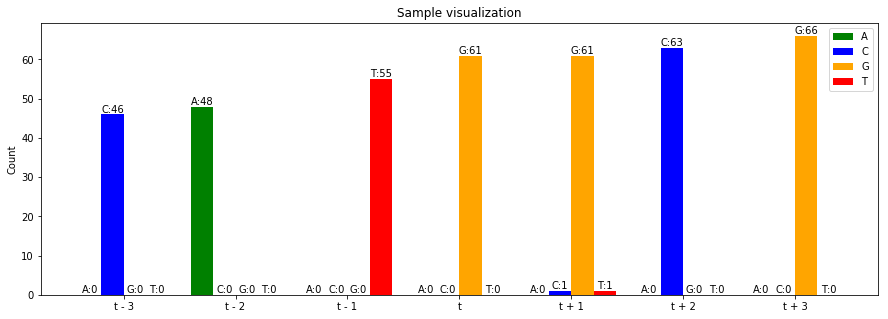

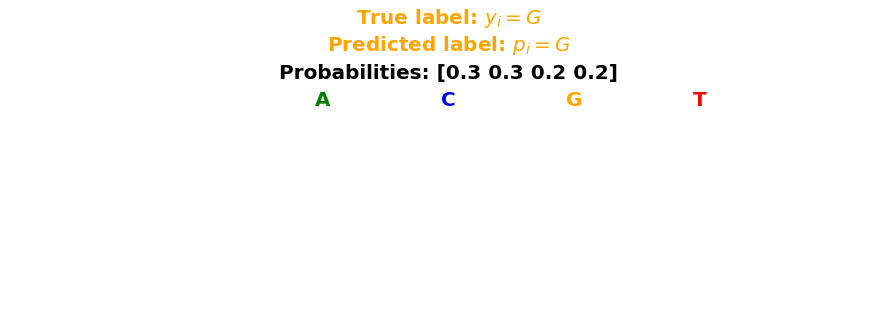

In [9]:
visualization.visualize_sample(new_X[0], y[0], np.array([0.3, 0.3, 0.2, 0.2]), np.array([0, 0, 1, 0]))

## Visualize random correct

perm [41528]


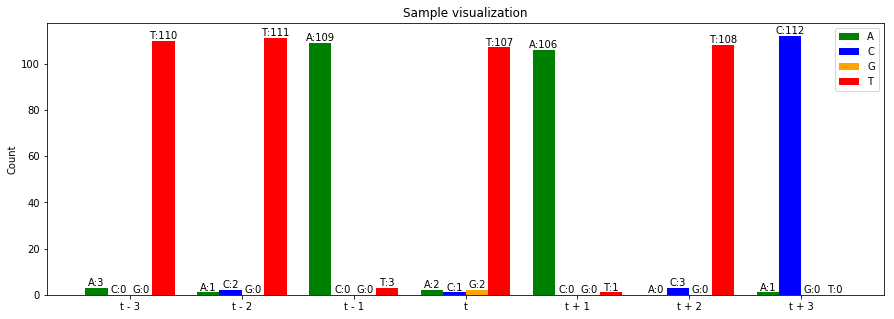

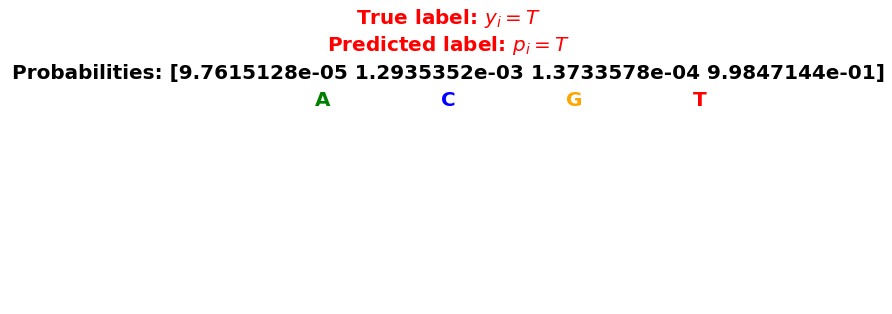

In [47]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_sample(xi, yi, prob_i, pred_i)

## Visualize random incorrect

perm [317153]


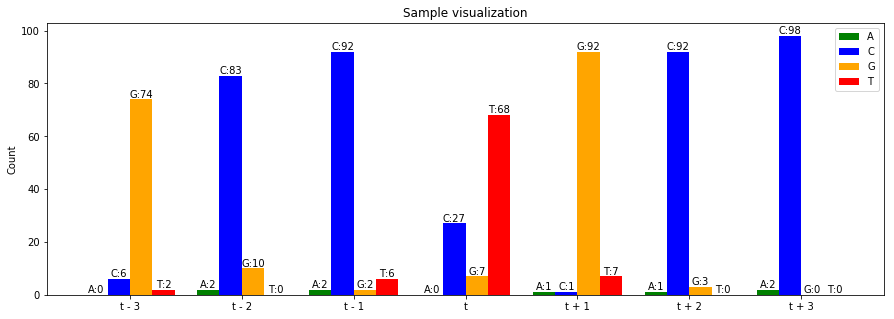

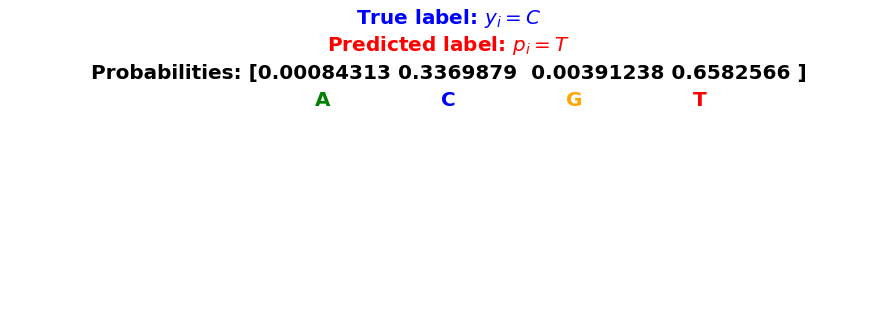

In [64]:
num_display = 1
correct_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_sample(xi, yi, prob_i, pred_i)